# YuGiOh

## Dataset

### Creazione del dataset

Il dataset che viene utilizzato in questo notebook viene creato dal file `setup.py`, che va a fare delle richieste HTTP ad una [API](https://ygoprodeck.com/api-guide/) per ricavare i seguenti campi:
* nome [`NAME`]
* tipo [`TYPE`]
* attributo [`ATTRIBUTE`]
* razza [`RACE`]
* livello [`LEVEL`]
* scala [`SCALE`]
* attacco [`ATK`]
* difesa [`DEF`]
* valore del link [`LINK_VALUE`]
* prezzo su Cardmarket [`CARDMARKET_PRICE`]
* prezzo su TcgPlayer [`TCGPLAYER_PRICE`]
* prezzo su Ebay [`EBAY_PRICE`]
* prezzo su Amazon [`AMAZON_PRICE`]
* prezzo su CoolStuffINC [`COOLSTUFFINC_PRICE`]

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

with open("../dataset.csv", "r") as f:
    data = pd.read_csv(f, delimiter=";")

len(data)

12429

Il dataset contiene $12429$ record, ognuno con i $14$ campi sopra descritti, anche se molte carte hanno dei valori `NaN`: questo é dato dal fatto che le carte sono molto varie e, ad esempio, una carta `Mostro` possiede la caratteristica di attacco che invece una carta `Magia` non ha

### Tipi di carte

Andiamo ad analizzare i vari tipi di carte che andiamo a trovare all'interno del gioco

In [45]:
card_type = data["TYPE"].unique()
len(card_type), card_type

(28,
 array(['Spell Card', 'Effect Monster', 'Normal Monster',
        'Flip Effect Monster', 'Trap Card', 'Union Effect Monster',
        'Fusion Monster', 'Pendulum Effect Monster', 'Link Monster',
        'XYZ Monster', 'Synchro Monster', 'Synchro Tuner Monster',
        'Tuner Monster', 'Gemini Monster', 'Normal Tuner Monster',
        'Spirit Monster', 'Ritual Effect Monster', 'Skill Card', 'Token',
        'Pendulum Effect Fusion Monster', 'Ritual Monster', 'Toon Monster',
        'Pendulum Normal Monster', 'Synchro Pendulum Effect Monster',
        'Pendulum Tuner Effect Monster', 'XYZ Pendulum Effect Monster',
        'Pendulum Effect Ritual Monster', 'Pendulum Flip Effect Monster'],
       dtype=object))

Vediamo il numero di carte che sono state rilasciate per tipo

In [60]:
count = data["TYPE"].value_counts()
count

Effect Monster                     4459
Spell Card                         2398
Trap Card                          1816
Normal Monster                      656
XYZ Monster                         482
Fusion Monster                      428
Tuner Monster                       423
Synchro Monster                     391
Link Monster                        373
Pendulum Effect Monster             254
Flip Effect Monster                 177
Ritual Effect Monster               110
Token                               107
Skill Card                          104
Gemini Monster                       45
Pendulum Normal Monster              37
Union Effect Monster                 36
Spirit Monster                       33
Synchro Tuner Monster                22
Toon Monster                         17
Ritual Monster                       15
Normal Tuner Monster                 10
Pendulum Effect Fusion Monster       10
XYZ Pendulum Effect Monster           9
Pendulum Tuner Effect Monster         8


Notiamo come le prime $4$ posizioni sono presenti le $4$ carte che hanno dominato il gioco dalla sua nascita:
* carte mostro con effetto
* carte magia
* carte trappola
* carte mostro normali

Con il tempo sono state introdotte sempre più carte, ma vista la tardiva introduzione le troviamo nelle posizioni più basse della "classifica"

Andiamo a considerare solo i tipi che hanno almeno $100$ carte per avere un grafico più chiaro e leggibile

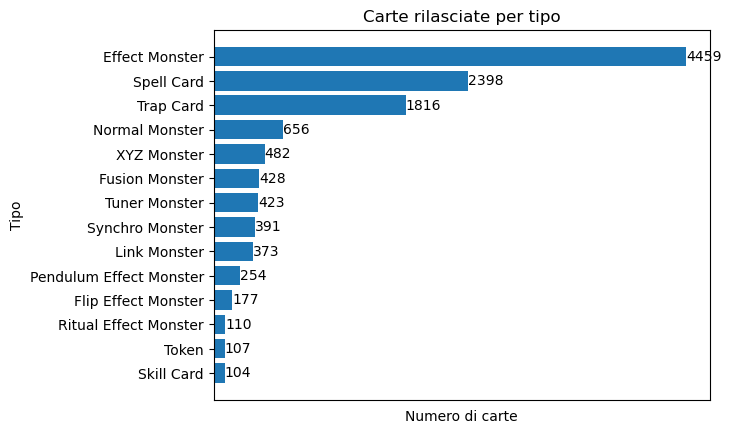

In [71]:
count = count.sort_values(ascending=True)
axis = list(filter(lambda t : t[0] >= 100, list(zip(count.values,count.index))))
x = [t[0] for t in axis]
y = [t[1] for t in axis]
plt.title("Carte rilasciate per tipo")
plt.xlabel("Numero di carte")
plt.ylabel("Tipo")
plt.xticks([])
bar = plt.barh(y,x)
plt.bar_label(bar)
plt.show()

Infine raggruppiamo questi $28$ tipi in $3$ grandi categorie:
* carte mostro
* carte magia e trappola
* token e carte skill

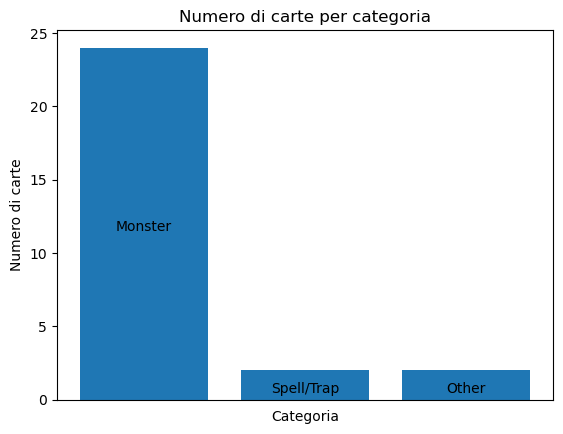

In [44]:
# Metti nel text il valore
monster = [t for t in card_type if "Monster" in t]
spelltrap = [t for t in card_type if "Trap" in t or "Spell" in t]
other = [t for t in card_type if t not in monster and t not in spelltrap]

plt.title("Numero di carte per categoria")
plt.xlabel("Categoria")
plt.ylabel("Numero di carte")
x,y,label = [0,1,2],[len(monster),len(spelltrap),len(other)],["Monster","Spell/Trap","Other"]
plt.bar(x,y)
for i in range(3):
    plt.text(i, y[i] / 2 - 0.5, label[i], ha="center")
plt.xticks([])
plt.show()